In [22]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [23]:
df  = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [26]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [91]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]


In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

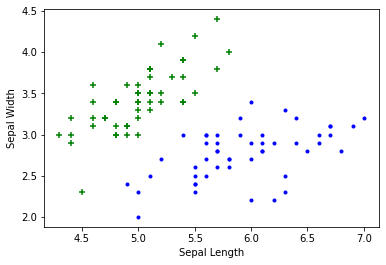

In [93]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

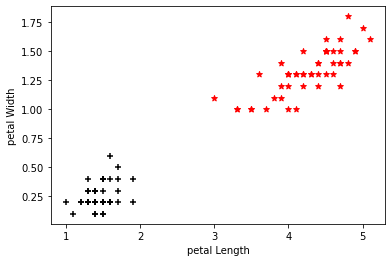

In [94]:
plt.xlabel('petal Length')
plt.ylabel('petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="black",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="red",marker='*')

In [95]:
X = df.drop(['target','flower_name'], axis='columns')
y = df.target

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [107]:
knn.predict([[4.8,3.2,2.0,3.3]])

array([0])

In [108]:
knn.score(x_test,y_test)

0.9555555555555556

In [109]:
knn.predict([[4.8,3.0,1.5,0.3]])

array([0])

In [114]:
len(x_test)

45

In [111]:
from sklearn.metrics import confusion_matrix
y_predict = knn.predict(x_test)
y_predict

array([1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2,
       1])

In [112]:
cm = confusion_matrix(y_test,y_predict)
cm


array([[11,  0,  0],
       [ 0, 21,  2],
       [ 0,  0, 11]], dtype=int64)

Text(69.0, 0.5, 'Truth')

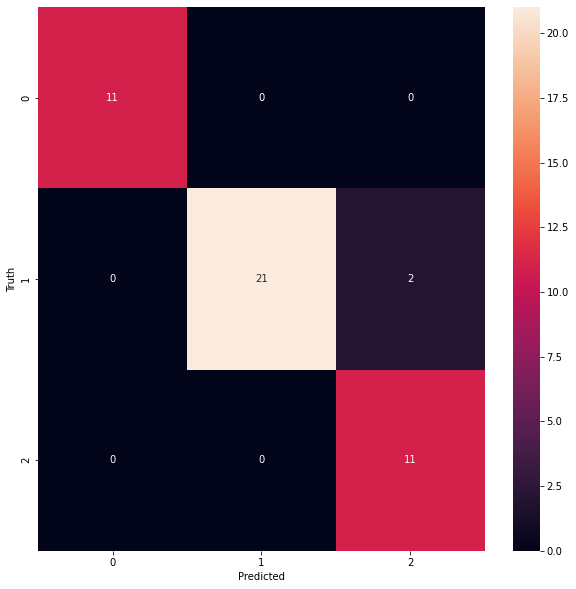

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")